# Assignment1
### Jialong Feng 10/02/2023

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wooldridge as wl

## 2.
 > (3.5 points) Use the bwght dataset from the Wooldridge python module to answer the following question.
You can find the documentation for the data online here. Import this data into your notebook.

(a) (1.5 Points) How many women are in the sample? What proportion of women with a family income
higher than $50,000 are smokers? What proportion of women with a family income less than $20,000
are smokers?

(b) (1 Points) Generate a table of summary statistics for the dataframe. What is the average number
of cigarettes smoked in a day? Is the mean a good measure of the typical women’s smoking habits?
If no, explain why and if there is a better measure.

(c) (1 Points) Find the mode of fatheduc in the sample. Why are only 1,192 observations used to
compute this statistic?

In [100]:
salary = wl.data('bwght')


faminc      665
cigtax      665
cigprice    665
bwght       665
fatheduc    574
motheduc    664
parity      665
male        665
white       665
cigs        665
lbwght      665
bwghtlbs    665
packs       665
lfaminc     665
dtype: int64
5.36%, 50.89%
            faminc       cigtax     cigprice        bwght     fatheduc  \
count  1388.000000  1388.000000  1388.000000  1388.000000  1192.000000   
mean     29.026657    19.552954   130.559006   118.699568    13.186242   
std      18.739285     7.795598    10.244485    20.353964     2.745985   
min       0.500000     2.000000   103.800003    23.000000     1.000000   
25%      14.500000    15.000000   122.800003   107.000000    12.000000   
50%      27.500000    20.000000   130.800003   120.000000    12.000000   
75%      37.500000    26.000000   137.000000   132.000000    16.000000   
max      65.000000    38.000000   152.500000   271.000000    18.000000   

          motheduc       parity         male        white         cigs  \
count  1

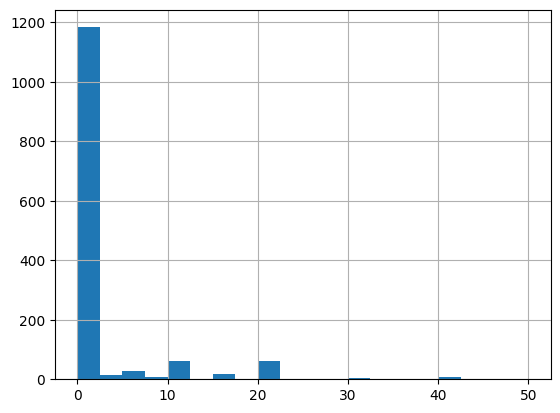

In [101]:
#(a)
#how many women in the sample
print(salary[salary['male'] ==0].count())
# 665 women


#woman with family income higher than $50000 or lower than $20000
high = salary[(salary['male'] == 0) & (salary['cigs'] != 0) & (salary['faminc'] > 50)].shape[0]/salary[(salary['male'] == 0) & (salary['cigs'] != 0)].shape[0]
low =  salary[(salary['male'] == 0) & (salary['cigs'] != 0) & (salary['faminc'] < 20)].shape[0]/salary[(salary['male'] == 0) & (salary['cigs'] != 0)].shape[0]
print("{}%, {}%".format(round(high*100,2),round(low*100,2)))
#5.36% smoking woman has family income higher than $50000
#50.89% smoking woman has family income lower than $20000


#(b)
print(salary.describe())
print(salary['cigs'].hist(bins=20))
#mean is not a good measure of the smoking habits. Because 
#the distribution of the statistics causes the mean to be rather
#different from the median. I prefer using median as the measure


#(c)
print(salary['fatheduc'].mode())
print(salary['fatheduc'].notnull().sum())
#the mode is 0, only 1192 rows are used because the rest
#are missing data


## 3.
(a)(1 point) Generate two different histograms of bwght using Sturge’s and FD binning methods.
Explain the strengths and weaknesses of each method when applied to bwght.

(b) (1 point) Create a histogram of bwght using either sturges or fd to choose the number of bins.
Overlay a density curve.

(c) (2 points) Using a q-q plot, do you believe bwght is approximately normally distributed? Why are
why not? What about family income?

(d) (1.5 points) Create a boxplot conditioning on whether

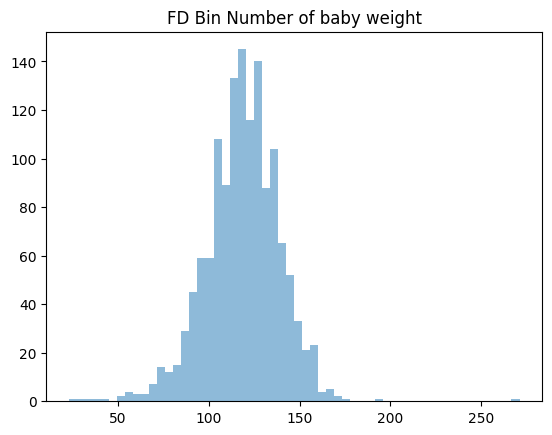

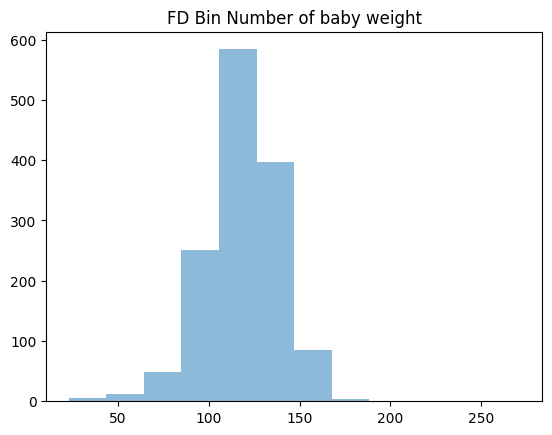

In [102]:
#(a)
#FD binning methods
plt.hist(salary['bwght'], alpha = .5, bins = "fd")
plt.title("FD Bin Number of baby weight")
plt.show()

#Sturge’s binning methods
plt.hist(salary['bwght'], alpha = .5, bins = "sturges")
plt.title("FD Bin Number of baby weight")
plt.show()

#Difference
#the Freedman-Diaconis rule is designed roughly to minimize the integral of the 
#squared difference between the histogram (i.e., relative frequency density) and 
#the density of the theoretical probability distribution.

# Sturges' rule: use a bin so large that there are about 
#1+log2n non-empty bins (Scott, 2009). This works well 
#for n under 200, but was found to be inaccurate for large n

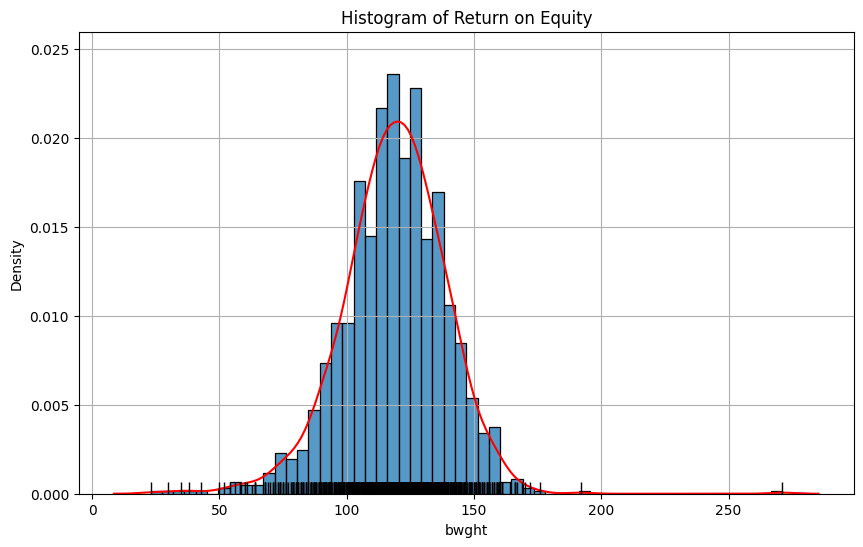

In [103]:
#(b) histogram overlayed with density curve 
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title("Histogram of Return on Equity")
sns.histplot(salary['bwght'], stat = "density")
sns.kdeplot(salary['bwght'], color = "red")
sns.rugplot(salary['bwght'], color = "black")

plt.grid()

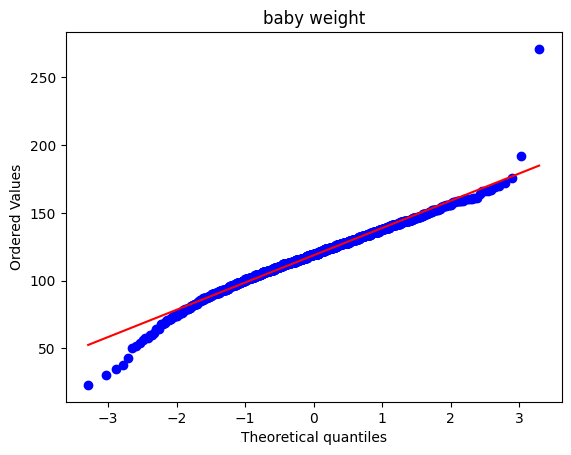

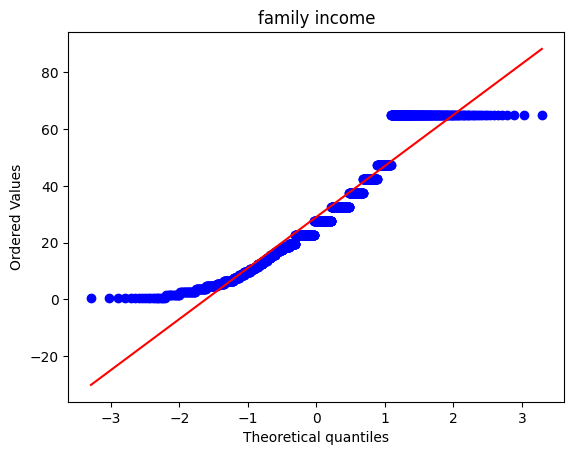

In [104]:
#(c) qq plot and distribution

import scipy.stats as stats

stats.probplot(salary['bwght'], dist="norm", plot=plt)
plt.title("baby weight")
plt.show()
stats.probplot(salary['faminc'], dist="norm", plot=plt)
plt.title("family income")
plt.show()

#baby weight is appraximately normally distributed
#family income is definitely not because the sample of smoking pregnant women is biased and does
#not follow a pattern of normal distribution

In [105]:
salary[(salary['cigs'] != 0)]['bwght']

22      129
63      104
68      119
74      115
92       93
       ... 
1348    124
1359    119
1361    115
1367    130
1375    102
Name: bwght, Length: 212, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


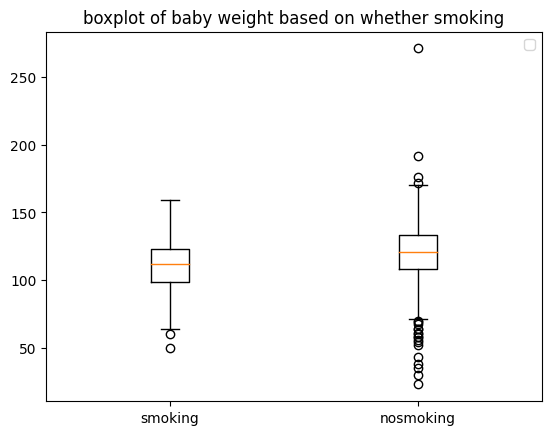

In [106]:
#(d) boxplot

plt.boxplot([salary[(salary['cigs'] != 0)]['bwght'],salary[(salary['cigs'] == 0)]['bwght']],labels=['smoking','nosmoking'])
plt.legend()
plt.title("boxplot of baby weight based on whether smoking")
plt.show()

#difference is that smoking pregnants' baby are lighter in weight

## 4. 
(6 points) Use the bwght dataset from the Wooldridge python module to answer the following question.

(a) (2 points) Estimate the parameters for the following simple regression:

bwˆght = βˆ0 + βˆ1packs

report the intercept and slope. What do these tell you about the association between cigarette use
and birth weight?

(b) (2 points) What is the predicted value of birthweight when packs = 0? When packs = 2? What is
the interpretation of the intercept?

(c) (1 point) Verify the residuals of this regression sum (approximately) to zero.

(d) (1 point) Using a scatter plot, show the observed values against the values predicted by a regression

In [107]:
import statsmodels.formula.api as smf

Intercept    119.771900
packs        -10.275442
dtype: float64
119.77190040261038 99.22101663835838
-4.8061110646813177e-11
-0.0


[]

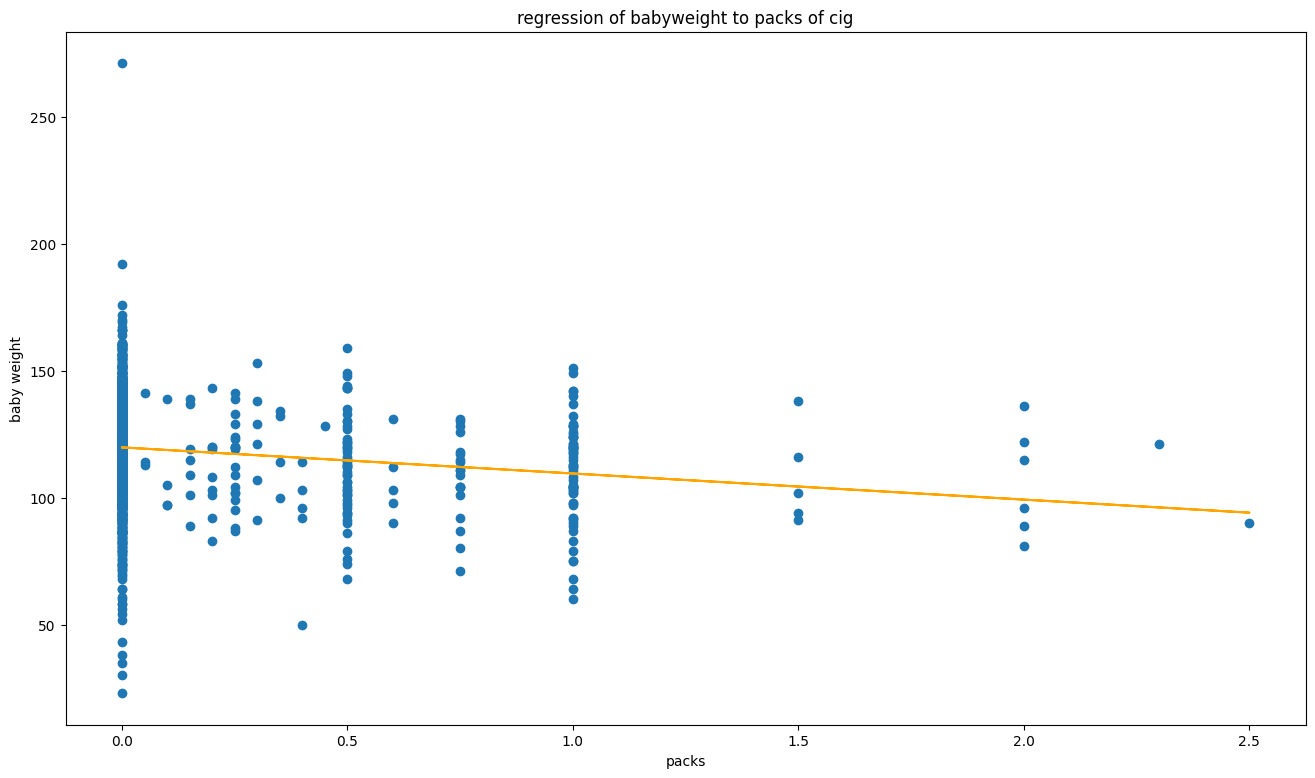

In [108]:
#(a)regression paramters
reg = smf.ols('bwght ~ packs', data= salary)
results = reg.fit()
print(results.params)
#coefficient is negative, showing that more smoking leads to lighter baby

#(b) predicted values
print(results.params[0],results.params[0]+results.params[1]*2)
#zero packs: 119.77 
#two packs: 99.22
#the intercept implies that when the independent variable (pack of cig)
#increase one unit, the in/decrease of the dependent variable (baby weight)
#is -10.28

#(c) verify the residuals
print(results.resid.sum())
print(round(results.resid.sum(),10))
#the sum of residual is approximately zero

#(d) scatter and lines
plt.figure(figsize = (16, 9))

# plot the observed values
plt.scatter(salary['packs'], salary['bwght'])

# plot roe vs the predicted or fitted values
plt.plot(salary['packs'], results.fittedvalues, color = "orange")

# add labels
plt.title("regression of babyweight to packs of cig")
plt.xlabel("packs")
plt.ylabel("baby weight")

plt.plot()

In [109]:
results.fittedvalues

0       119.7719
1       119.7719
2       119.7719
3       119.7719
4       119.7719
          ...   
1383    119.7719
1384    119.7719
1385    119.7719
1386    119.7719
1387    119.7719
Length: 1388, dtype: float64